# **Customer Segmentation Using KMeans Clustering**

### **Objective**
This project aims to segment customers into distinct groups based on their **Annual Income** 
and **Spending Score**. Using the **KMeans clustering algorithm**, we can identify clusters of similar customers, which is useful for targeted marketing, customer profiling, and optimizing service delivery.

## **Steps and Analysis**

### **1. Import Required Libraries**

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **2. Load and Preview the Dataset**
Load the data from the `Mall_Customers.csv` file and inspect its first few rows, shape, and structure to understand the columns and check for missing values.

In [160]:
# Load the data
customer_df = pd.read_csv("Datasets/Mall_Customers.csv")

In [162]:
# Display first few rows and basic info
print(customer_df.head())
print("\nDataset shape:", customer_df.shape)
print("\nDataset info:")
print(customer_df.info())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset shape: (200, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


#### **Expected Output:**
The dataset contains **200 entries** with **5 columns:**`CustomerID`, `Gender`, `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`. There are no missing values.

### **3. Feature Selection**
We are interested in clustering based on **Annual Income** and **Spending Score**, so we'll select these two columns as features for our analysis.

In [166]:
# Select features for clustering
X = customer_df[["Annual Income (k$)", "Spending Score (1-100)"]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### **4. Determine the Optimal Number of Clusters Using the Elbow Method**
The **Elbow Method** helps determine the optimal number of clusters by plotting the **Within-Cluster Sum of Squares (WCSS)** for different values of `k`. The "elbow point" (where the WCSS starts decreasing more slowly) indicated an optimal number of clusters.

In [126]:
# Calculate WCSS for different cluster numbers
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

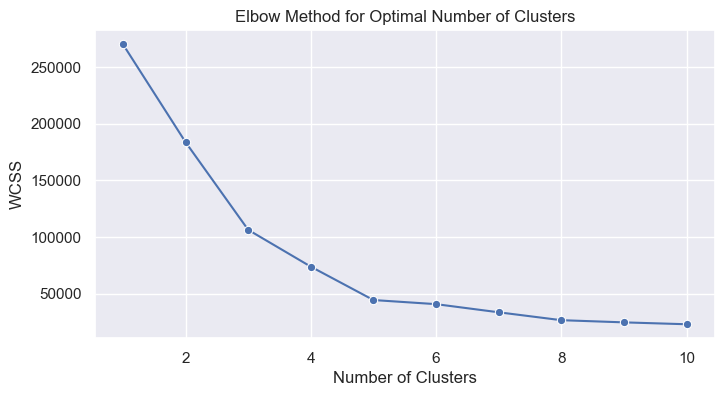

In [134]:
# Plot the Elbow graph
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 11), y=wcss, marker="o", color="b")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### **Expected Output:**
The Elbow Plot displays WCSS values for cluster numbers 1 to 10. The "elbow point" typically
occurs around 4-6 clusters. This suggests that an optimal choice of clusters lies within this range.

### **5. Validate Clusters Using Silhouette Score Analysis**
To confirm the best cluster number, we calculate the **Silhouette Score** for each `k` from 2
to 10. This score ranges from -1 to +1, where higher scores indicate better-defined clusters.

In [138]:
# Calculate silhouette scores for clusters from 2 to 10
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg}")

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2, the average silhouette score is : 0.39564531743995546
For n_clusters = 3, the average silhouette score is : 0.46761358158775435


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4, the average silhouette score is : 0.4937945814354117
For n_clusters = 5, the average silhouette score is : 0.553931997444648


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6, the average silhouette score is : 0.5128405328004378
For n_clusters = 7, the average silhouette score is : 0.5017174409749505


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8, the average silhouette score is : 0.4962769338093321


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 9, the average silhouette score is : 0.45587414130065596
For n_clusters = 10, the average silhouette score is : 0.4426214845978157


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### **Expected Output:**
The silhouette scores help identify the optimal number of clusters `k` for our data. Generally, scores closer to 1 indicate well-separated clusters, and in our case, using around **5 clusters** may offer the best balance for effective clustering. 

### **6. Train the Model with Optimal Clusters and Predict Labels**
According to the silhouette method, for `n_clusters = 5`, the average silhouette score is **0.5539**, which indicates a moderate level of clustering quality.

In [142]:
# Set optimal cluster number
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init="k-means++", random_state=42)
Y = kmeans.fit_predict(X)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### **7. Visualize Clusters and Centroids**
Plot the clusters along with their centroids. Each color represents a unique cluster, allowing us to visually identify the customer segments.

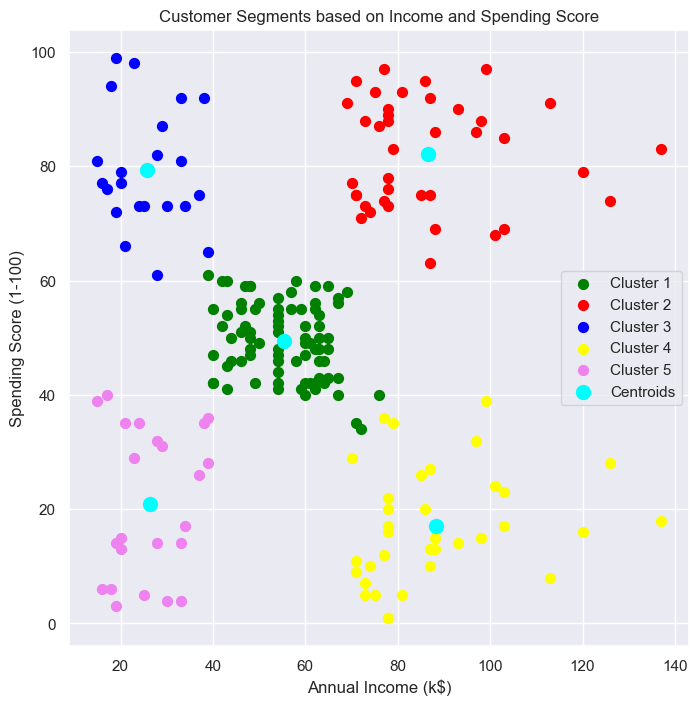

In [145]:
# Plot clusters and centroids
plt.figure(figsize=(8, 8))
colors = ["green", "red", "blue", "yellow", "violet"]
for i in range(optimal_clusters):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], s=50, c=colors[i], label=f"Cluster {i+1}")

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="cyan", label="Centroids")
plt.title("Customer Segments based on Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

#### **Expected Output:**
The plot will display **five distinct clusters** representing customer segments based on income and spending score, with cyan-colored centroids marking the center of each cluster. This visualization helps identify characteristics of different customer groups.

### **Analysis & Insights**
- **High-Income, High-Spending (Cluster 2):** These are potentially loyal, high-value customers who may be responsive to premium services and exclusive offers.
- **Low-Income, High-Spending (Cluster 3):** These customers might spend a significant portion of their budget on mall shopping, so marketing could focus on promotions or rewards programs to maintain their interest.
- **Moderate-Income, Moderate-Spending (Cluster 1):** These customers are essential for maintaining consistent revenue. Strategies could include loyalty programs or seasonal discounts.
- **High-Income, Low-Spending (Cluster 4):** Understanding why these customers spend less can inform strategies to increase their engagement, possibly through targeted marketing or new product offerings.
- **Low-Income, Low-Spending (Cluster 5):** This group might be more price-sensitive, and marketing could focus on budget-friendly options or promotions to attract them.

These insights help businesses segment their customer base, leading to more effective marketing, better customer service, and improved product offerings.